In [1]:
# Importing the required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import string
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Dataset loading
file_path = "dataset1.xlsx"
dataset = pd.read_excel(file_path)

if dataset['review'].dtype == 'object':
    dataset['review'] = dataset['review'].astype(str)

# Text preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # POS tagging
    pos_tags = pos_tag(tokens)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for word, tag in pos_tags:
        if tag.startswith('NN'):  # Noun
            pos = 'n'
        elif tag.startswith('VB'):  # Verb
            pos = 'v'
        else:
            pos = 'a'  # Adjective or adverb
        lemmatized_tokens.append(lemmatizer.lemmatize(word, pos))
    
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    no_punctuation_tokens = [token.translate(table) for token in lemmatized_tokens]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in no_punctuation_tokens if word.lower() not in stop_words]
    
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Sentiment analysis implementation
def perform_sentiment_analysis(text):
    analysis = TextBlob(str(text))
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        sentiment_label = "Positive"
    elif polarity == 0:
        sentiment_label = "Neutral"
    else:
        sentiment_label = "Negative"
    return sentiment_label, polarity


# Integration of text preprocessing and sentiment analysis results into the dataset
dataset['Preprocessed_review'] = dataset['review'].apply(preprocess_text)
dataset['Sentiment_Label'], dataset['Sentiment_Polarity'] = zip(*dataset['Preprocessed_review'].apply(perform_sentiment_analysis))

# Regression analysis
X = dataset['Sentiment_Polarity'].values.reshape(-1, 1)
y = dataset['Rating'].values.reshape(-1, 1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Making predictions
y_pred = regression_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


Mean Squared Error: 1.7263287871461441


In [2]:
# Displaying the updated dataset with sentiment analysis results
print(dataset.head(50))

                                         Product_name  \
0   Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
1   Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
2   Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
3   Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
4   Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
5   Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
6   Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
7   Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
8   Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
9   Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
10  Samsung Galaxy M31 Prime Edition (Ocean Blue, ...   
11  Samsung Galaxy M31 Prime Edition (Ocean Blue, ...   
12  Samsung Galaxy M31 Prime Edition (Ocean Blue, ...   
13  Samsung Galaxy M31 Prime Edition (Ocean Blue, ...   
14  Samsung Galaxy M31 Prime Edition (Ocean Blue, ...   
15  Samsung Galaxy M31 Prime Edition (Ocean Blue, ...   
16  Samsung Galaxy M31 Prime Ed

In [3]:
#Hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the hyperparameter grid
param_grid = {
    'fit_intercept': [True, False],  # Whether to fit the intercept
}

# Create the GridSearchCV object
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Best Model):", mse)


Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error (Best Model): 1.7263287871461441


In [4]:
# Training multiple versions to check for best configuration
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of hyperparameters to explore
hyperparameters = [
    {'fit_intercept': True},
    {'fit_intercept': False}
]

# Train models with different hyperparameters
models = []
for params in hyperparameters:
    model = make_pipeline(StandardScaler(), LinearRegression(**params))
    model.fit(X_train, y_train)
    models.append(model)

# Evaluate model performance
mse_values = []
for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Compare performance
best_model_index = mse_values.index(min(mse_values))
best_model = models[best_model_index]
best_params = hyperparameters[best_model_index]
best_mse = mse_values[best_model_index]

# Print results
print("Model Performances:")
for i, params in enumerate(hyperparameters):
    print(f"Model {i+1} Hyperparameters:", params)
    print(f"Model {i+1} MSE:", mse_values[i])
    print()

print("Best Model Hyperparameters:", best_params)
print("Best Model MSE:", best_mse)


Model Performances:
Model 1 Hyperparameters: {'fit_intercept': True}
Model 1 MSE: 1.7263287871461437

Model 2 Hyperparameters: {'fit_intercept': False}
Model 2 MSE: 12.080389330290076

Best Model Hyperparameters: {'fit_intercept': True}
Best Model MSE: 1.7263287871461437


In [5]:
# Adding n-Grams
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dataset['review'], dataset['Rating'], test_size=0.2, random_state=42)

# Define a pipeline for text feature extraction and modeling
text_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2))),  # Include both unigrams and bigrams
    ('regressor', LinearRegression())
])

# Train the model
text_pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = text_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.271190001017087


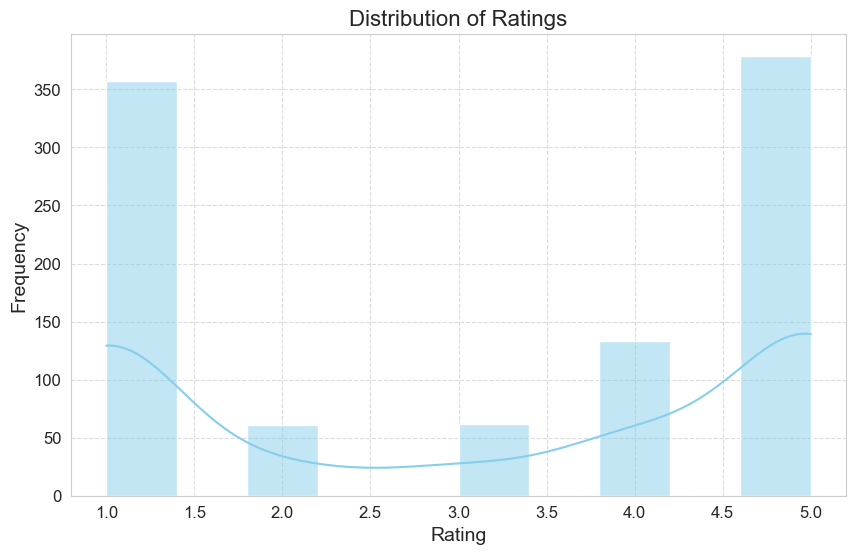

In [6]:
# Histogram of Ratings
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


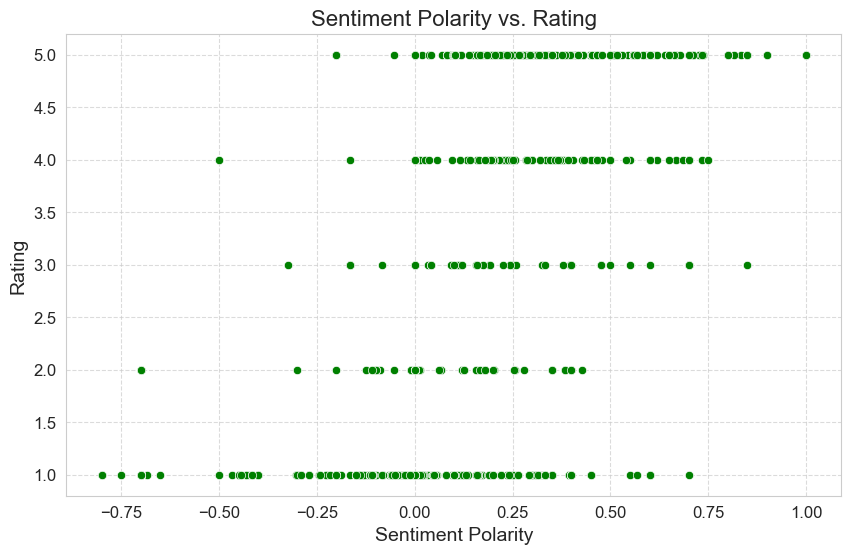

In [7]:
# Scatter Plot of Sentiment Polarity vs. Rating
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sentiment_Polarity', y='Rating', data=dataset, color='green')
plt.title('Sentiment Polarity vs. Rating', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


C:\Users\Yash\AppData\Local\Temp\ipykernel_22724\3206037885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment_Label', y='Rating', data=dataset, palette='Set2')


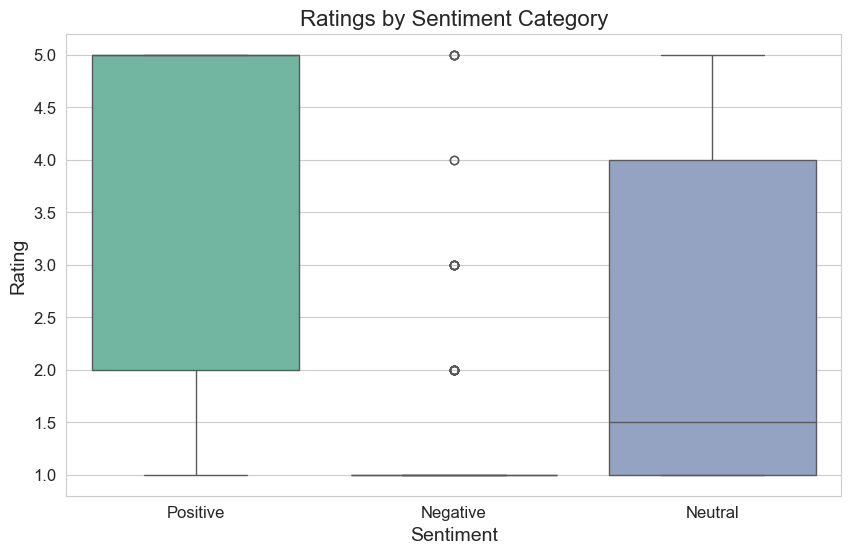

In [11]:
# Box Plot of Ratings by Sentiment Category
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment_Label', y='Rating', data=dataset, palette='Set2')
plt.title('Ratings by Sentiment Category', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


C:\Users\Yash\AppData\Local\Temp\ipykernel_22724\3059979241.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment_Label', y='Rating', data=average_ratings, palette='pastel')


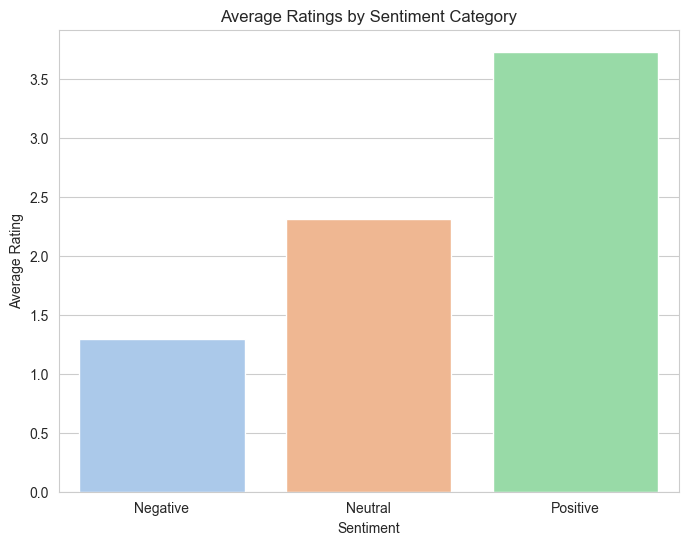

In [9]:
# Bar Plot of Average Ratings by Sentiment Category
average_ratings = dataset.groupby('Sentiment_Label')['Rating'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment_Label', y='Rating', data=average_ratings, palette='pastel')
plt.title('Average Ratings by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()

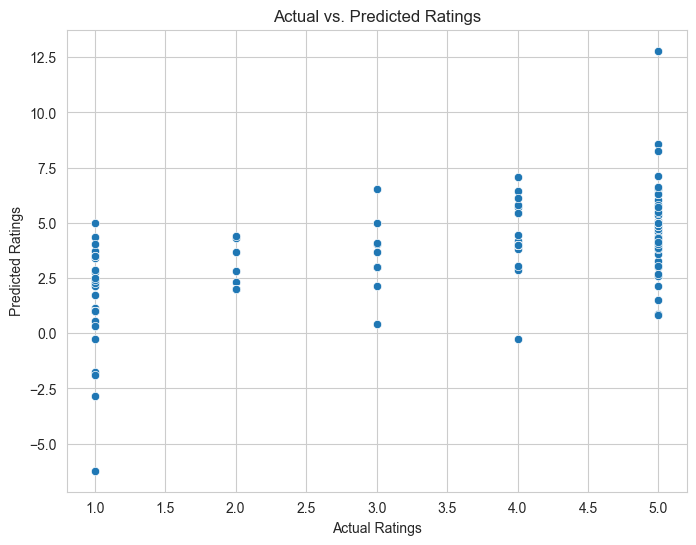

In [10]:
# ... (rest of your code)

# Visualizing Regression Analysis Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.tolist(), y=y_pred.tolist())
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()
